# Group F - Risk Based Segmentation 



## Introduction

Customer segmentation involves categorizing the portfolio by industry, location, revenue, account size, and number of employees and many other variables to reveal where risk and opportunity live within the portfolio. Those patterns can then provide key measurable data points for more predictive credit risk management. Taking a portfolio approach to risk management gives credit professionals a better fix on the accounts, in order to develop strategies for better serving segments that present the best opportunities. Not only that, you can work to maximize performance
in all customer segments, even seemingly risky segments.

Customer segmentation analysis can lead to several tangible improvements in credit risk management: stronger credit policies, and improved internal communication and cooperation across teams.


In [ ]:
#!pip install --upgrade git+http://github.com/renero/dataset
#!pip install skrebate
#!pip install gplearn
#!pip install git+git://github.com/andirs/impyte.git

In [42]:
import pandas as pd
import RiskDataframe as rdf
dataframe = pd.read_csv("AUTO_LOANS_DATA.csv", sep=";")

myrdf = rdf.RiskDataframe(dataframe)




In [43]:
myrdf.shape

(900860, 14)

In [21]:
myrdf.columns

Index(['REPORTING_DATE', 'ACCOUNT_NUMBER', 'CUSTOMER_ID', 'PROGRAM_NAME',
       'LOAN_OPEN_DATE', 'EXPECTED_CLOSE_DATE', 'ORIGINAL_BOOKED_AMOUNT',
       'OUTSTANDING', 'BUCKET', 'SEX', 'CUSTOMER_OPEN_DATE', 'BIRTH_DATE',
       'PROFESSION', 'CAR_TYPE'],
      dtype='object')

In [23]:
myrdf.isna().sum()

REPORTING_DATE                0
ACCOUNT_NUMBER                0
CUSTOMER_ID                   0
PROGRAM_NAME                  0
LOAN_OPEN_DATE                0
EXPECTED_CLOSE_DATE           0
ORIGINAL_BOOKED_AMOUNT        0
OUTSTANDING                   0
BUCKET                        0
SEX                        4528
CUSTOMER_OPEN_DATE            0
BIRTH_DATE                 4533
PROFESSION                 5558
CAR_TYPE                  11518
dtype: int64

# Checking the data Types

In [24]:
myrdf.dtypes

REPORTING_DATE             object
ACCOUNT_NUMBER              int64
CUSTOMER_ID                 int64
PROGRAM_NAME               object
LOAN_OPEN_DATE             object
EXPECTED_CLOSE_DATE        object
ORIGINAL_BOOKED_AMOUNT    float64
OUTSTANDING               float64
BUCKET                      int64
SEX                        object
CUSTOMER_OPEN_DATE         object
BIRTH_DATE                 object
PROFESSION                 object
CAR_TYPE                   object
dtype: object

# EDA

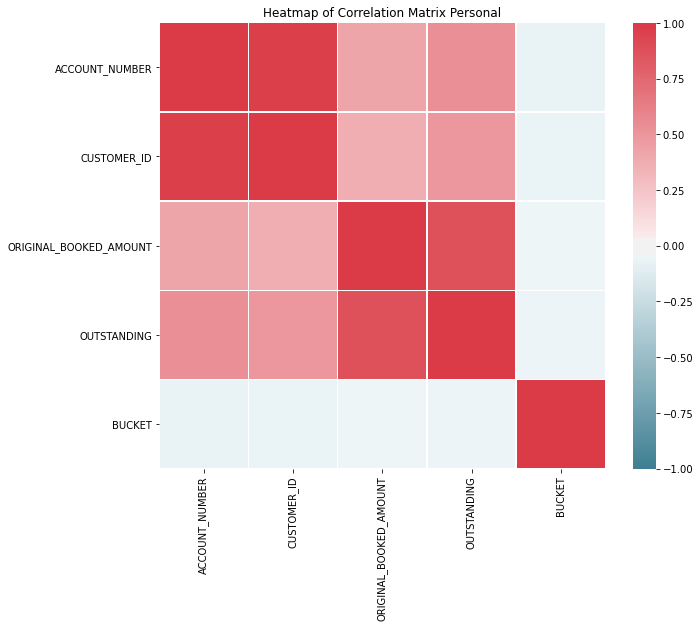

In [44]:
myrdf.heatPlot()


       ACCOUNT_NUMBER    CUSTOMER_ID  ORIGINAL_BOOKED_AMOUNT   OUTSTANDING  \
count   900860.000000  900860.000000            9.008600e+05  9.008600e+05   
mean     18640.732433   17934.779021            8.871387e+04  6.082437e+04   
std      10383.344609   10143.452204            5.487869e+04  5.363223e+04   
min          1.000000       1.000000            1.500000e+04 -1.114100e+02   
25%       9788.000000    9287.000000            5.600000e+04  2.570558e+04   
50%      19073.000000   18248.000000            7.550000e+04  4.828475e+04   
75%      27258.000000   26383.000000            1.050000e+05  8.173332e+04   
max      39597.000000   38396.000000            2.000000e+06  2.000000e+06   

              BUCKET  
count  900860.000000  
mean        0.282671  
std         0.763767  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         7.000000  


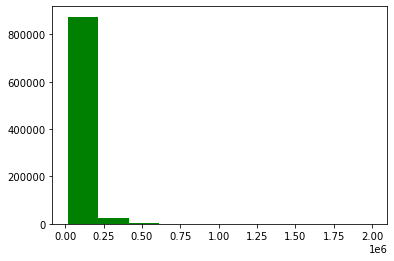

In [46]:
myrdf.plot_risk("ORIGINAL_BOOKED_AMOUNT")


       ACCOUNT_NUMBER    CUSTOMER_ID  ORIGINAL_BOOKED_AMOUNT   OUTSTANDING  \
count   900860.000000  900860.000000            9.008600e+05  9.008600e+05   
mean     18640.732433   17934.779021            8.871387e+04  6.082437e+04   
std      10383.344609   10143.452204            5.487869e+04  5.363223e+04   
min          1.000000       1.000000            1.500000e+04 -1.114100e+02   
25%       9788.000000    9287.000000            5.600000e+04  2.570558e+04   
50%      19073.000000   18248.000000            7.550000e+04  4.828475e+04   
75%      27258.000000   26383.000000            1.050000e+05  8.173332e+04   
max      39597.000000   38396.000000            2.000000e+06  2.000000e+06   

              BUCKET  
count  900860.000000  
mean        0.282671  
std         0.763767  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         7.000000  


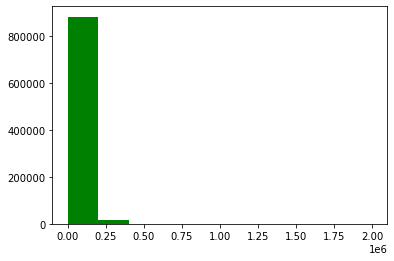

In [47]:
myrdf.plot_risk("OUTSTANDING")



## 1) Implement a method .missing_not_at_random() 


In [27]:
myrdf.missing_not_at_random(input_vars=[]) 


Missing Not At Random Repport (MNAR) - SEX, BIRTH_DATE, PROFESSION, CAR_TYPE variables seem Missing Not at Random, there for we recommend: 
 
 Thin File Segment Variables (all others variables free of MNAR issue): REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, BUCKET, CUSTOMER_OPEN_DATE 
 
 Full File Segment Variables: REPORTING_DATE, ACCOUNT_NUMBER, CUSTOMER_ID, PROGRAM_NAME, LOAN_OPEN_DATE, EXPECTED_CLOSE_DATE, ORIGINAL_BOOKED_AMOUNT, OUTSTANDING, BUCKET, SEX, CUSTOMER_OPEN_DATE, BIRTH_DATE, PROFESSION, CAR_TYPE


In [28]:
pivot_value = 'ACCOUNT_NUMBER'
target_value = 'BUCKET'
down_payment = 'PROGRAM_NAME'
income_status = 'PROFESSION'
birth_date = 'BIRTH_DATE'
dates_todays = ['REPORTING_DATE','LOAN_OPEN_DATE','EXPECTED_CLOSE_DATE','CUSTOMER_OPEN_DATE']


myrdf.start(pivot_value,birth_date,target_value, down_payment,income_status,dates_todays)




,ACCOUNT_NUMBER,CUSTOMER_ID,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,BIRTH_DATE,PROFESSION,CAR_TYPE,DOWN_PAYMENT,TYPE,REPORTING_DATE_DAYS_LAPSED,LOAN_OPEN_DATE_DAYS_LAPSED,EXPECTED_CLOSE_DATE_DAYS_LAPSED,CUSTOMER_OPEN_DATE_DAYS_LAPSED
143,144,144,140500.0,0.00,0,M,39,ACTIVE,UNKNOWN,0.5,EMPLOYED,2047,2275,1558,3039
247,248,248,70000.0,0.00,1,F,37,ACTIVE,UNKNOWN,0.5,EMPLOYED,2047,3571,1740,3584
308,309,307,65500.0,0.00,0,M,44,ACTIVE,UNKNOWN,0.5,EMPLOYED,2047,3277,1466,3283
350,351,349,44500.0,0.00,1,M,40,ACTIVE,UNKNOWN,0.5,EMPLOYED,2047,2620,1163,2625
465,466,12,93000.0,0.00,0,UNKNOWN,UNKNOWN,ACTIVE,UNKNOWN,0.0,CORPORATE,2047,3481,2050,7614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,36547,35528,90000.0,78956.52,0,M,27,ACTIVE,GELORY,0.5,EMPLOYED,741,1077,-725,1088
900856,39597,38396,92500.0,92826.06,0,F,44,ACTIVE,GELORY,0.5,EMPLOYED,741,742,-1091,755
900857,38016,36905,140250.0,114919.47,0,M,41,ACTIVE,NISSAN,0.0,CORPORATE,741,902,189,953
900858,38899,37739,105000.0,101714.25,0,M,35,ACTIVE,DFSK,0.0,CORPORATE,741,805,-999,834


# Setting the data Types 

In [29]:
# Setting the types
argument_dict = {'PROGRAM_NAME':'category','SEX':'category',
                'PROFESSION':'category','CAR_TYPE':'category'}
myrdf.SetAttributes(argument_dict)
myrdf.dtypes

REPORTING_DATE              object
ACCOUNT_NUMBER               int64
CUSTOMER_ID                  int64
PROGRAM_NAME              category
LOAN_OPEN_DATE              object
EXPECTED_CLOSE_DATE         object
ORIGINAL_BOOKED_AMOUNT     float64
OUTSTANDING                float64
BUCKET                       int64
SEX                       category
CUSTOMER_OPEN_DATE          object
BIRTH_DATE                  object
PROFESSION                category
CAR_TYPE                  category
dtype: object

##	2) implement a method the Segmentation Method




In [30]:
seg_data_cat =['SEX','PROFESSION','CAR_TYPE','TYPE']

In [31]:
myrdf.set_train_cat(target_value,seg_data_cat)

(['The total accuracy using all variable and Logistic regression is: 0.8686868686868687',
  'Using: SEX GINI Full Model Seg1: 30.303745053332285%',
  'Using: SEX GINI Segmented Model Seg1: 30.303745053332285%',
  'Using: SEX GINI Full Model Seg2: 19.219512195121947%',
  'Using: SEX GINI Segmented Model Seg2:19.219512195121947%',
  'Using: PROFESSION GINI Full Model Seg1: 26.49165350778253%',
  'Using: PROFESSION GINI Segmented Model Seg1: 26.49165350778253%',
  'Using: PROFESSION GINI Full Model Seg2: nan%',
  'Using: PROFESSION GINI Segmented Model Seg2:nan%',
  'Using: CAR_TYPE GINI Full Model Seg1: 47.844112769485925%',
  'Using: CAR_TYPE GINI Segmented Model Seg1: 47.844112769485925%',
  'Using: CAR_TYPE GINI Full Model Seg2: 22.12240785828228%',
  'Using: CAR_TYPE GINI Segmented Model Seg2:22.12240785828228%',
  'Using: TYPE GINI Full Model Seg1: 24.75394321766562%',
  'Using: TYPE GINI Segmented Model Seg1: 24.75394321766562%',
  'Using: TYPE GINI Full Model Seg2: 55.555555555555

In [32]:
seg_data_num = ['ORIGINAL_BOOKED_AMOUNT','OUTSTANDING','BIRTH_DATE','DOWN_PAYMENT','REPORTING_DATE_DAYS_LAPSED','LOAN_OPEN_DATE_DAYS_LAPSED','EXPECTED_CLOSE_DATE_DAYS_LAPSED','CUSTOMER_OPEN_DATE_DAYS_LAPSED']

In [33]:
myrdf.encod(seg_data_cat)

,ACCOUNT_NUMBER,BIRTH_DATE,BUCKET,CAR_TYPE_AUDI,CAR_TYPE_BAIC,CAR_TYPE_BMW,CAR_TYPE_BRILLIANCE,CAR_TYPE_BYD,CAR_TYPE_CARRY,CAR_TYPE_CHANA,...,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,PROFESSION_ACTIVE,PROFESSION_UNEMPLOYED,REPORTING_DATE_DAYS_LAPSED,SEX_F,SEX_M,SEX_UNKNOWN,TYPE_CORPORATE,TYPE_EMPLOYED
143,144.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140500.0,0.00,1.0,0.0,2047.0,0.0,1.0,0.0,0.0,1.0
247,248.0,37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70000.0,0.00,1.0,0.0,2047.0,1.0,0.0,0.0,0.0,1.0
308,309.0,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,0.00,1.0,0.0,2047.0,0.0,1.0,0.0,0.0,1.0
350,351.0,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44500.0,0.00,1.0,0.0,2047.0,0.0,1.0,0.0,0.0,1.0
465,466.0,UNKNOWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93000.0,0.00,1.0,0.0,2047.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900855,36547.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90000.0,78956.52,1.0,0.0,741.0,0.0,1.0,0.0,0.0,1.0
900856,39597.0,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,92500.0,92826.06,1.0,0.0,741.0,1.0,0.0,0.0,0.0,1.0
900857,38016.0,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140250.0,114919.47,1.0,0.0,741.0,0.0,1.0,0.0,1.0,0.0
900858,38899.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105000.0,101714.25,1.0,0.0,741.0,0.0,1.0,0.0,1.0,0.0


In [34]:
myrdf.set_train_num(seg_data_cat,target_value,seg_data_num)

(['The total accuracy using all variable and Logistic regression is: 0.8881829733163914',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Full Model Seg1: 35.66609830232039%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Segmented Model Seg1: 35.66609830232039%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Full Model Seg2: 45.264030310206024%',
  'Using: ORIGINAL_BOOKED_AMOUNT GINI Segmented Model Seg2: 45.264030310206024%',
  'Using: OUTSTANDING GINI Full Model Seg1: 47.80138859667578%',
  'Using: OUTSTANDING GINI Segmented Model Seg1: 47.80138859667578%',
  'Using: OUTSTANDING GINI Full Model Seg2: 33.6887534907337%',
  'Using: OUTSTANDING GINI Segmented Model Seg2: 33.6887534907337%',
  'Using: BIRTH_DATE GINI Full Model Seg1: 39.5159865748101%',
  'Using: BIRTH_DATE GINI Segmented Model Seg1: 39.5159865748101%',
  'Using: BIRTH_DATE GINI Full Model Seg2: 34.40599069014372%',
  'Using: BIRTH_DATE GINI Segmented Model Seg2: 34.40599069014372%',
  'Using: DOWN_PAYMENT GINI Full Model Seg1: 34.9462365591398%

---